## Problem Statement: 
### Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('Mall_customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Exploratory Data Analysis (EDA)

In [4]:
data.shape

(200, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


C:\Users\NISHITA\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


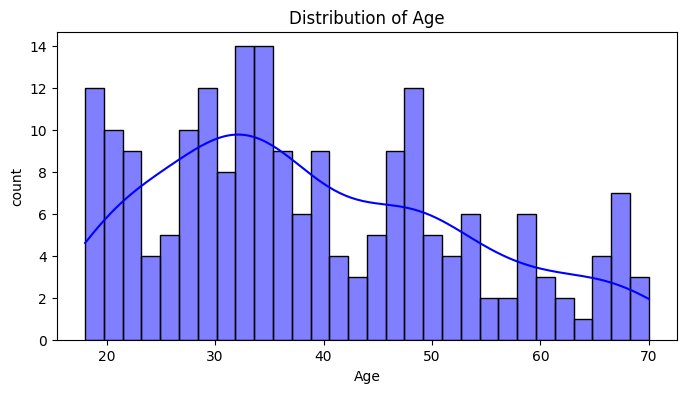

In [8]:
# Distribution of Age 
plt.figure(figsize=(8, 4))
sns.histplot(data['Age'], bins=30, kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

C:\Users\NISHITA\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


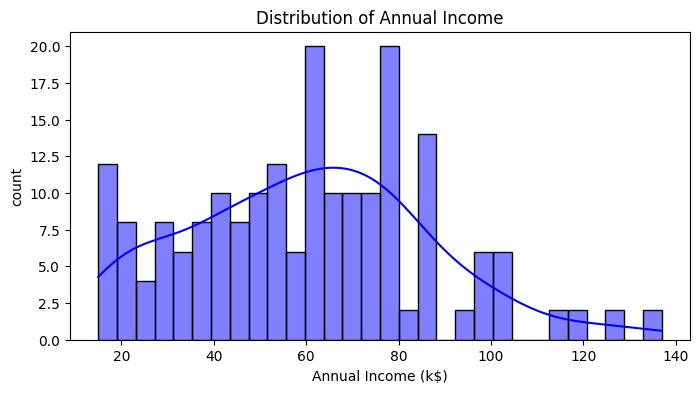

In [9]:
# Distribution of Annual Income
plt.figure(figsize=(8, 4))
sns.histplot(data['Annual Income (k$)'], bins=30, kde=True, color='blue')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('count')
plt.show()

C:\Users\NISHITA\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


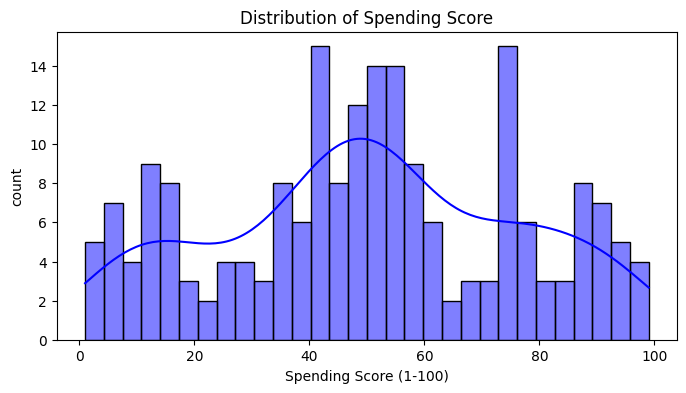

In [10]:
# Distribution of Spending Score
plt.figure(figsize=(8, 4))
sns.histplot(data['Spending Score (1-100)'], bins=30, kde=True, color='blue')
plt.title('Distribution of Spending Score')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('count')
plt.show()

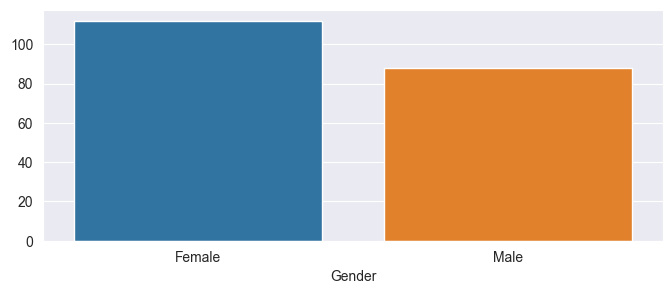

In [11]:
#Gender Analysis:
genders = data.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(8,3))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

## Implement K means Clustering

In [12]:
#features for clustering (e.g., Annual Income and Spending Score)
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

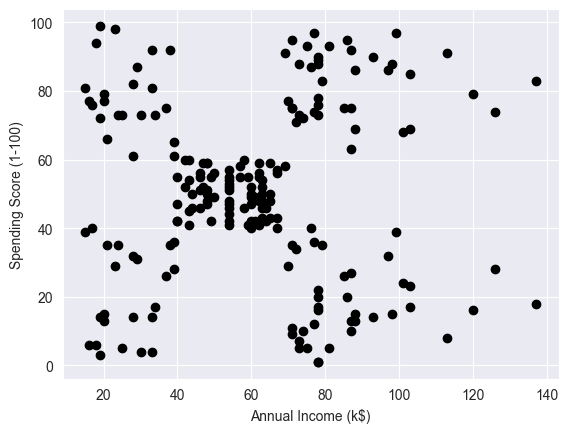

In [14]:
plt.scatter(X["Annual Income (k$)"],X["Spending Score (1-100)"],c='black')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [15]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
# Determine the optimal number of clusters using the elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

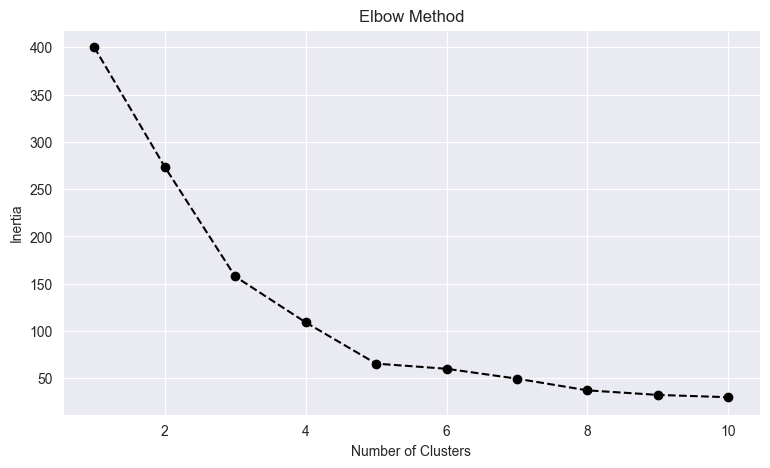

In [19]:
# Plot the elbow curve
plt.figure(figsize=(9, 5))
plt.plot(range(1, 11), inertia, marker='o', color = 'black',linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [36]:
# Choose the optimal number of clusters (e.g., 5)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=5, random_state=42)

In [37]:
data['Cluster'] = kmeans.labels_
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


## Visualize the clusters

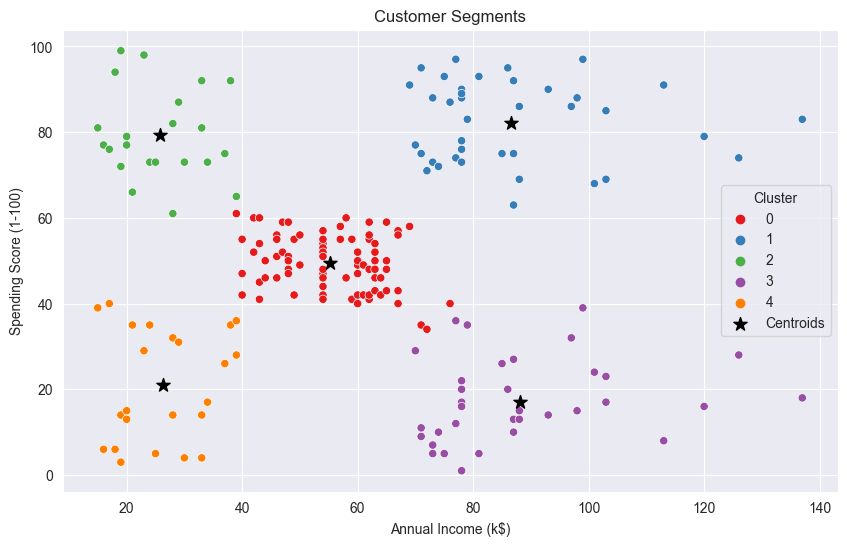

In [38]:
# Plot the clusters
centroids = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids)  # Inverse scaling

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='Set1')
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='black', marker='*', label='Centroids')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()


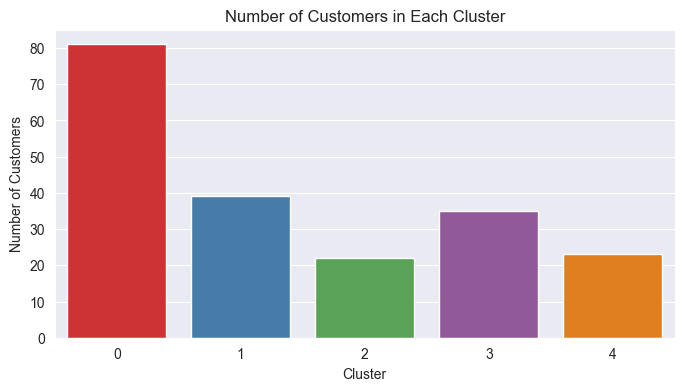

In [39]:
# Count of customers in each cluster
cluster_counts = data['Cluster'].value_counts().sort_index()

plt.figure(figsize=(8, 4))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='Set1')
plt.title('Number of Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

### Analysis insights: :
<span style='color:red'> Cluster 0 : Medium income and moderate spending. Represents regular shoppers who contribute to steady revenue; loyalty programs could boost their engagement.  </span>

<span style='color:blue'> Cluster 1 : High income and high spending. The most valuable segment; targeting them with premium products and exclusive offers can maximize revenue.
 </span>

<span style='color:green'> Cluster 2 :  Low income but high spending. Likely to respond well to promotions and value-driven offers, despite limited income.
 </span>

<span style='color:purple'> Cluster 3 : High income but cautious spending. Marketing strategies that emphasize value or necessity may encourage them to spend more.
 </span>

<span style='color:orange'> Cluster 4 : Low income and low spending. Very price-sensitive; appealing to them requires focusing on essential items and clear cost-saving offers. </span>


In [40]:
# Save the dataset with cluster labels
output_path = 'Mall_Customers_with_Clusters.csv'
data.to_csv(output_path, index=False)

print(f"Clustered data saved to {output_path}")


Clustered data saved to Mall_Customers_with_Clusters.csv
